
## HOUSING PRICE PREDICTION USING MULTIPLE LINEAR REGRESSION ANALYSIS

##### By: Tony Ige
***

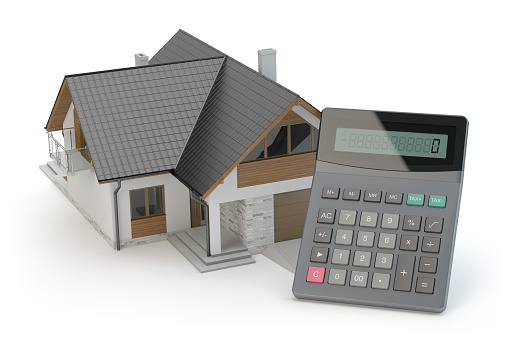

In [2]:
from IPython.display import Image
Image("image.jpg")

<a id="tableofcontents"></a>
Table of Contents:

* [Import  The Libraries](#section_1)
* [Load the Dataset into Dataframe](#section_2)
* [Exploratory Data Analysis](#section_3)
* [MultiCollinearity Check](#section_4)
* [Build the Model](#section_5)
* [Calculate the Measure of Error](#section_6)
* [Principal Component Analysis](#section_pr)
* [Conclusion](#section_7)


<a id="section_1"></a>
#### Importing Libraries: 
Neccesary Libraries in the requirement.txt will be imported 

<a id="section_2"></a>
#### LOAD THE DATASET INTO DATAFRAME




In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 2000)

In [5]:
data_kc = pd.read_csv('https://raw.githubusercontent.com/Amberlynnyandow/dsc-1-final-project-online-ds-ft-021119/master/kc_house_data.csv', na_values=["nan","n.a","not available","?","NaN"])

In [6]:
data_kc.to_csv('Kings-county-Dataset.csv')

In [7]:
data_kc = pd.read_csv('Kings-county-Dataset.csv')

In [8]:
data_kc.shape

(21597, 22)

Check the number of rows and columns in the dataset

Dataset comprises of 21597 observations and 22 characteristics or attributes


To check the first five rows:

In [9]:
data_kc.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Checking for Null values:

In [10]:

data_kc.isnull().any()

Unnamed: 0       False
id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [11]:
data_kc.isna().sum()

Unnamed: 0          0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Get the statistics about the Dataset

In [12]:
data_kc.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Data Preprocessing

check the condition values in the 'condition' column

In [13]:
data_kc['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [14]:
data_kc.loc[data_kc['bedrooms'] == 33]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [15]:
data_kc['bedrooms'][15856] = 3

C:\Users\Tony\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data_kc.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,6234.661218,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,0.000000,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5399.000000,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,10798.000000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,16197.000000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21596.000000,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
data = data_kc.fillna({'yr_renovated': 0, 'sqft_basement': data_kc['sqft_basement'].mean(), 'view':0, 'waterfront': 0})

In [18]:
data.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
from manipulation import Manipulation

In [20]:
data['Month'] = data['date'].map(lambda x: Manipulation(x).month())

In [21]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2


In [22]:
data['Month'].unique()

array(['10', '12', '2', '5', '6', '1', '4', '3', '7', '8', '11', '9'],
      dtype=object)

In [23]:
data['Seasons'] = data['Month'].map(lambda x: Manipulation(x).seasonCalc())

In [24]:
data['Seasons'].unique()

array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

In [25]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Seasons
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,Fall
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,Winter
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,Winter
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,Winter
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,Winter


In [26]:
# Rename the condition categories
data['condition'].replace({1 : 'Bad', 2 : 'Not_Good', 3 : 'Good', 4 : 'Very_Good', 5 : 'Excellent'}, inplace=True)

In [27]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [28]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Month',
       'Seasons'],
      dtype='object')

In [29]:
data.to_csv('CleanedData.csv')

In [30]:
data = pd.read_csv('CleanedData.csv')

create a new column

In [31]:
Data_new = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'Seasons']

In [32]:
data = data[Data_new]

In [33]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Seasons
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,Good,7,1180,0.0,1955,0.0,1340,5650,Fall
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,Good,7,2170,400.0,1951,1991.0,1690,7639,Winter
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,Good,6,770,0.0,1933,0.0,2720,8062,Winter
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,Excellent,7,1050,910.0,1965,0.0,1360,5000,Winter
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,Good,8,1680,0.0,1987,0.0,1800,7503,Winter


<a id="section_4"></a>
##### MultiCollinearity Check

[Back To Table of Contents](#tableofcontents)

Use seaborn to create a jointplot to compare the bedrooms and price columns. check does the correlation make sense?

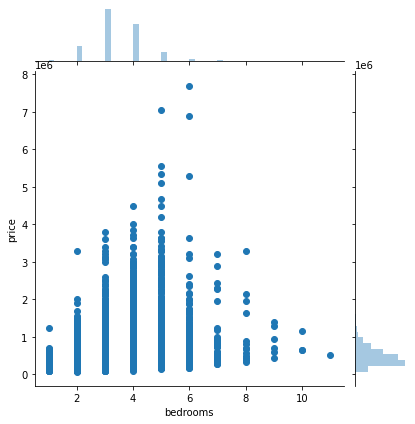

In [34]:
sns.jointplot(x='bedrooms',y='price',data=data_kc)

In [35]:
# Print a correlation matrix of the dataframe
corr = data.corr()

# Display the correlation
display(corr)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.667951,0.605368,0.322192,0.053953,0.117855,0.585241,0.082845
bedrooms,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,-0.002053,0.080747,0.366181,0.492549,0.305370,0.160748,0.018629,0.404540,0.031898
bathrooms,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.665838,0.686668,0.279541,0.507173,0.047177,0.569884,0.088303
sqft_living,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.762779,0.876448,0.430190,0.318152,0.051060,0.756402,0.184342
sqft_lot,0.089876,0.033606,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,0.114731,0.184139,0.015293,0.052946,0.004979,0.144763,0.718204
floors,0.256804,0.183721,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,0.458794,0.523989,-0.242359,0.489193,0.003793,0.280102,-0.010722
waterfront,0.264306,-0.002053,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.082818,0.071778,0.083779,-0.024487,0.073939,0.083823,0.030658
view,0.393497,0.080747,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.249082,0.166017,0.272313,-0.054452,0.090339,0.278928,0.073083
grade,0.667951,0.366181,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,1.000000,0.756073,0.166397,0.447865,0.015623,0.713867,0.120981
sqft_above,0.605368,0.492549,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,0.756073,1.000000,-0.051781,0.424037,0.020645,0.731767,0.195077


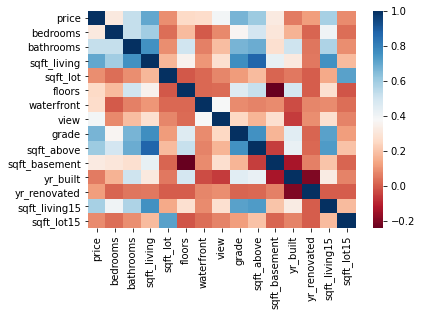

In [36]:
# plot a heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

Checking the heatmap with the correlation matrix, we can identify some highly correlated variables like sqft_above and sqft_living, sqft_lot and sqft_lot15, grade and sqft_above and so on. 

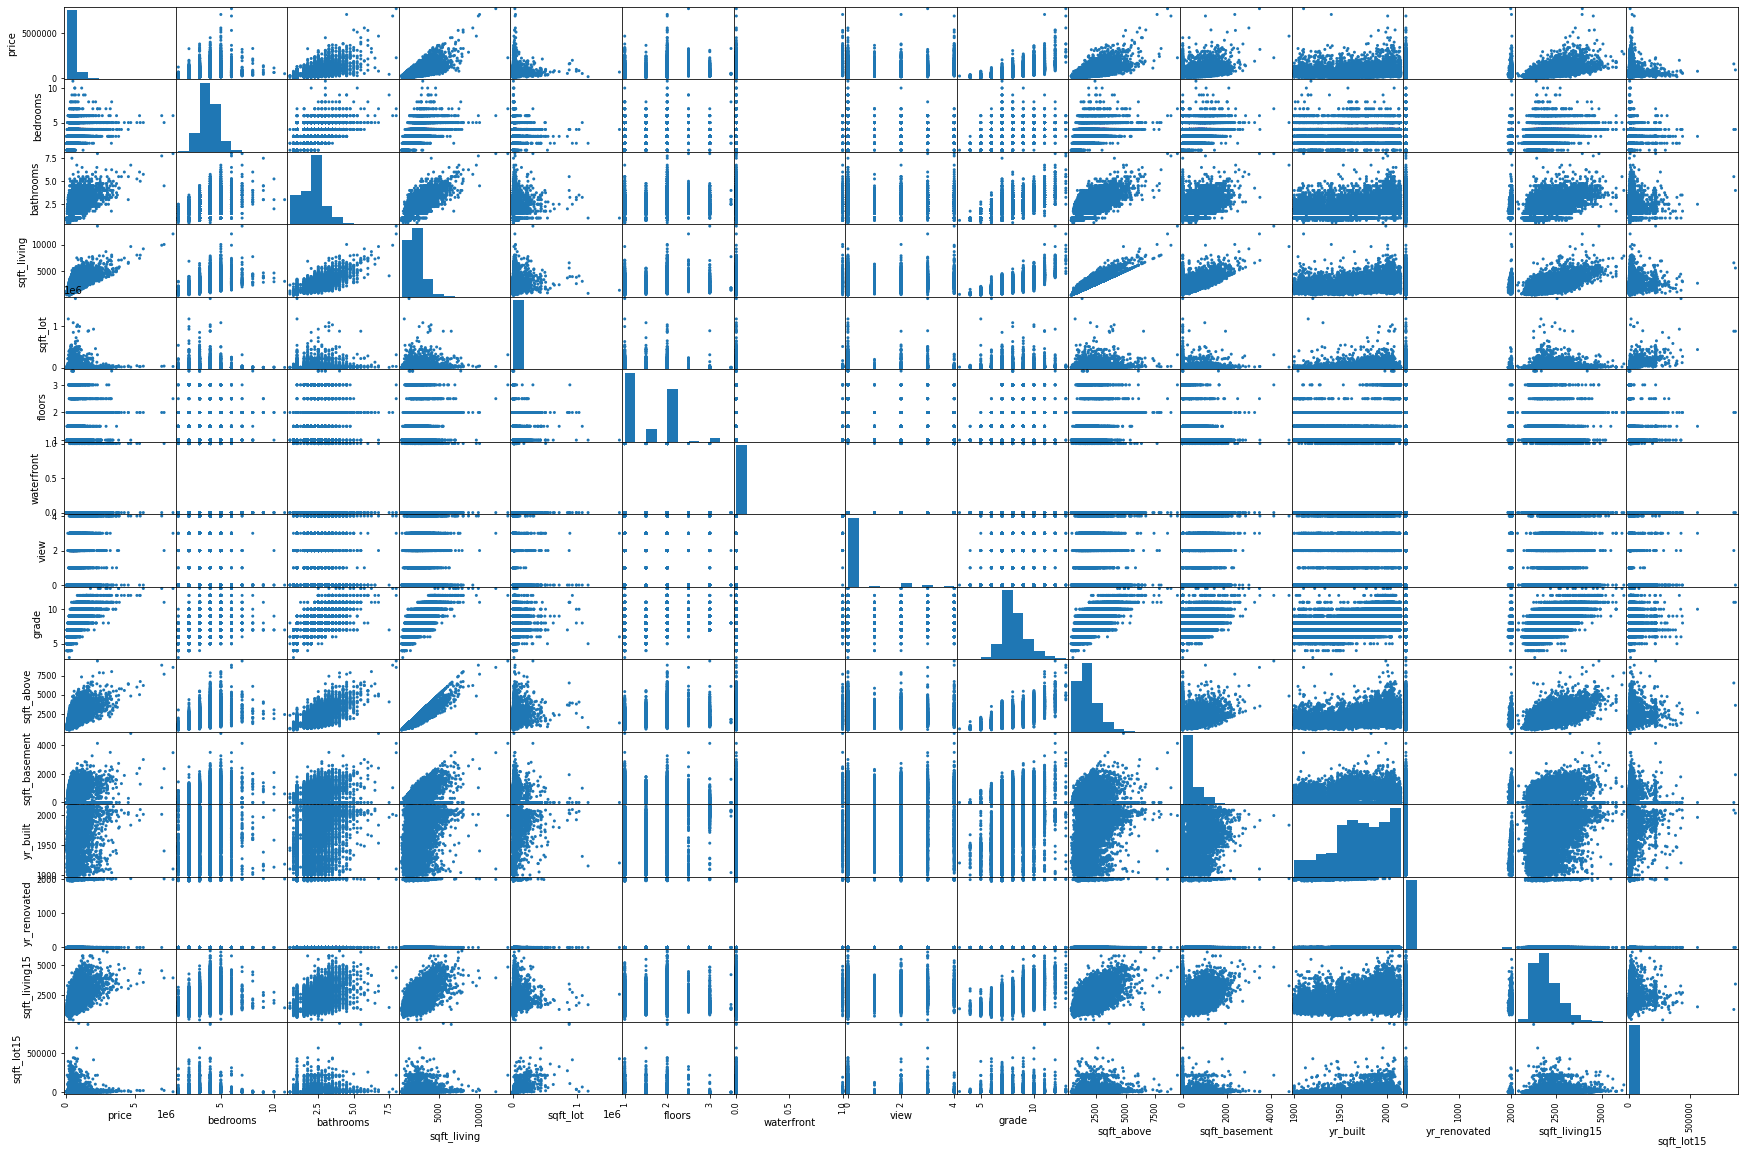

In [37]:
# We can display the scatter plot
pd.plotting.scatter_matrix(data, alpha = 1, figsize = (30, 20))

# Show the plot
plt.show()

<a id="section_5"></a>
#### Build the Model


In [38]:
data = pd.get_dummies(data)

In [39]:
y = data['price']
X = data.drop(['price'], axis = 1)

In [40]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,condition_Bad,condition_Excellent,condition_Good,condition_Not_Good,condition_Very_Good,Seasons_Fall,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,0.0,1955,0.0,1340,5650,0,0,1,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,400.0,1951,1991.0,1690,7639,0,0,1,0,0,0,0,0,1
2,2,1.00,770,10000,1.0,0.0,0.0,6,770,0.0,1933,0.0,2720,8062,0,0,1,0,0,0,0,0,1
3,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965,0.0,1360,5000,0,1,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987,0.0,1800,7503,0,0,1,0,0,0,0,0,1


Splitting the dataset

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [45]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,condition_Bad,condition_Excellent,condition_Good,condition_Not_Good,condition_Very_Good,Seasons_Fall,Seasons_Spring,Seasons_Summer,Seasons_Winter
5931,3,1.00,1780,7800,1.0,0.0,0.0,7,1060,720.000000,1957,0.0,1450,7800,0,0,1,0,0,1,0,0,0
19984,3,2.50,1260,1102,3.0,0.0,0.0,8,1260,0.000000,2007,0.0,1320,2500,0,0,1,0,0,1,0,0,0
13637,4,1.75,2140,4959,1.0,0.0,0.0,7,1080,1060.000000,1965,0.0,1590,5250,0,0,1,0,0,0,1,0,0
11462,3,3.50,1340,1168,2.0,0.0,2.0,8,1080,260.000000,2002,0.0,1650,1378,0,0,1,0,0,0,1,0,0
19036,3,1.00,1040,9514,1.0,0.0,0.0,7,1040,0.000000,1969,0.0,1040,9514,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,3,2.25,2420,7548,1.0,0.0,0.0,8,1370,1050.000000,1967,0.0,2150,8000,0,0,0,0,1,0,0,1,0
17289,3,1.50,1060,5750,1.0,0.0,0.0,7,1060,0.000000,1981,0.0,1060,5750,0,0,0,1,0,0,0,0,1
5192,3,1.75,1540,13002,1.0,0.0,0.0,8,1200,291.851724,1984,0.0,1620,10098,0,0,0,1,0,0,0,1,0
12172,3,2.50,2420,49928,2.0,0.0,0.0,8,1860,560.000000,1985,0.0,2620,37301,0,0,1,0,0,0,1,0,0


In [46]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,condition_Bad,condition_Excellent,condition_Good,condition_Not_Good,condition_Very_Good,Seasons_Fall,Seasons_Spring,Seasons_Summer,Seasons_Winter
16729,3,1.75,1210,8864,1.0,0.0,0.0,7,1210,0.0,1985,0.0,1510,8062,0,0,1,0,0,0,1,0,0
10996,4,1.00,1190,7920,1.0,0.0,0.0,6,890,300.0,1951,0.0,1140,7920,0,0,1,0,0,0,0,0,1
12089,2,2.25,1550,1824,2.0,0.0,0.0,8,1550,0.0,2007,0.0,1460,1826,0,0,1,0,0,0,0,0,1
554,3,1.50,1300,8280,1.0,0.0,0.0,7,1300,0.0,1956,0.0,1570,8692,0,1,0,0,0,1,0,0,0
16075,4,2.75,2420,7102,1.0,0.0,0.0,7,1670,750.0,1946,0.0,1620,7102,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13541,3,1.00,1530,9465,1.0,0.0,0.0,7,1530,0.0,1960,0.0,1530,9465,0,0,0,0,1,0,0,0,1
10735,3,1.00,1050,7577,1.0,0.0,0.0,7,1050,0.0,1983,0.0,1430,7245,0,0,1,0,0,0,1,0,0
11018,2,1.00,860,10500,1.0,0.0,0.0,6,860,0.0,1943,0.0,950,10500,0,0,1,0,0,0,0,0,1
13521,3,1.00,1030,8164,1.0,0.0,0.0,7,1030,0.0,1950,0.0,1340,8164,0,0,0,0,1,0,0,1,0


In [47]:
y_train

5931      261000.0
19984     445000.0
13637     350000.0
11462     370350.0
19036     299000.0
           ...    
10955     282000.0
17289     317000.0
5192      492450.0
12172     429000.0
235      1030000.0
Name: price, Length: 17277, dtype: float64

  > #### Standardizing our model

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

In [50]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

> #### Applying the Linear Regression Algorithm

In [51]:
model_lr1 = LinearRegression() # Initialize Linear Regression Algorithm

In [52]:
model_lr1.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = model_lr1.predict(X_test)

In [54]:
y_test

16729    244500.0
10996    190000.0
12089    348500.0
554      396000.0
16075    665000.0
           ...   
13541    252000.0
10735    194000.0
11018    235000.0
13521    332500.0
8369     300000.0
Name: price, Length: 4320, dtype: float64

In [55]:
y_pred

array([227334.33140047, 135531.49641622, 414692.16416494, ...,
       190038.69038842, 285305.14085816, 333824.5141791 ])

<a id="section_6"></a>
#### Calculate the Measure of Error for Linear Regression



Now our model has been trained, the next step is to evaluate the performance of the model. The metrics used for the evaluation of linear regression model are mean squared error (MSE), and mean absolute error (MAE). The following script finds the value for these metrics for the linear regression algorithm:

In [56]:
 mean_squared_error(y_pred, y_test)

43097713263.912186

In [57]:
mean_absolute_error(y_pred, y_test)

137487.6872433523

#### Random Forest  Regressor Algorithm
[Back To Table of Contents](#tableofcontents)

In [60]:
model_rf1 = RandomForestRegressor()

In [61]:
model_rf1.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
model_rf1.feature_importances_

array([7.43121742e-03, 2.01578057e-02, 2.52100579e-01, 3.43474067e-02,
       5.03838752e-03, 2.22243975e-02, 1.82773581e-02, 3.79401956e-01,
       2.62286853e-02, 1.22486069e-02, 9.82371069e-02, 3.51443062e-03,
       6.13558681e-02, 4.00041593e-02, 4.69487983e-05, 2.17900124e-03,
       2.93073306e-03, 2.58068019e-04, 2.37441285e-03, 2.17467077e-03,
       3.05680525e-03, 2.72942095e-03, 3.68197403e-03])

In [1]:
y_pred = model_rf1.predict(X_test)

NameError: name 'model_rf1' is not defined

#### Calculate the Measure of Error for Random Forest

In [64]:
mean_squared_error(y_pred, y_test)

36682613579.69615

In [65]:
mean_absolute_error(y_pred, y_test)

113857.2963512015

> ***Training the Model on Standardized  dataset***

In [66]:
model_rf1_std = RandomForestRegressor()
model_rf1_std.fit(X_train_std, y_train)

RandomForestRegressor()

In [67]:
y_pred = model_rf1_std.predict(X_test_std)

In [68]:
model_rf1_mse = mean_squared_error(y_pred, y_test)

In [69]:
type(float(model_rf1_mse))

float

In [70]:
model_rf1_mae = mean_absolute_error(y_pred, y_test)

In [71]:
resultDict = {}
resultDict['model_rf1_mse'] = [model_rf1_mse]
resultDict['model_rf1_mae'] = [model_rf1_mae]

In [72]:
col = ['model_rf1_mse', 'model_rf1_mae']
errorComp = pd.DataFrame(resultDict)

In [73]:
errorComp

,model_rf1_mse,model_rf1_mae
0,3.767556e+10,116280.795278


In [74]:
resultDict

{'model_rf1_mse': [37675558523.9539], 'model_rf1_mae': [116280.79527810846]}

> #### Decision Tree Regressor

In [75]:
# Import our classifier
from sklearn.tree import DecisionTreeRegressor

In [76]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [77]:
model_dt1 = DecisionTreeRegressor()

In [78]:
model_dt1.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
y_pred = model_dt1.predict(X_test)

In [80]:
y_test

16729    244500.0
10996    190000.0
12089    348500.0
554      396000.0
16075    665000.0
           ...   
13541    252000.0
10735    194000.0
11018    235000.0
13521    332500.0
8369     300000.0
Name: price, Length: 4320, dtype: float64

In [81]:
y_pred

array([278000., 529000., 320000., ...,  82000., 405000., 251100.])

#### Calculate the Measure of Error for Decision Tree

In [82]:
 mean_squared_error(y_pred, y_test)

65484399598.57656

In [83]:
mean_absolute_error(y_pred, y_test)

155736.83761574075

<a id="section_pr"></a>
> ### Principal Component Analysis

In [84]:
from sklearn.decomposition import PCA

In [86]:
X_train_pca = pca.fit(X_train_std)
X_test_pca = pca.fit(X_test_std)

In [87]:
X_train_pca

PCA()

In [88]:
X_train_pca.explained_variance_

array([5.10188724e+00, 2.35796576e+00, 1.70780980e+00, 1.47724481e+00,
       1.43526192e+00, 1.36476597e+00, 1.20937439e+00, 1.16256313e+00,
       1.04522573e+00, 1.03582859e+00, 9.85733560e-01, 9.56040067e-01,
       6.72861927e-01, 6.09909084e-01, 5.17118304e-01, 4.09971846e-01,
       2.77087631e-01, 2.57188968e-01, 2.21380256e-01, 1.96429138e-01,
       3.67717828e-03, 2.97074793e-32, 1.89248483e-32])

In [89]:
pca = PCA(n_components=8)

> #### Principal Component Analysis on Linear Regression algorithm

In [90]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [91]:
X_train_pca

array([[-1.77670308, -0.34965976, -0.12981127, ...,  0.19822388,
        -2.01693821,  1.49673685],
       [ 0.26968635, -2.66534651, -0.23276502, ...,  0.02359342,
        -1.18866219,  2.43622966],
       [-0.74915431,  0.19922822, -0.68486174, ...,  0.13177924,
        -0.61407843, -1.07130279],
       ...,
       [-1.64608792,  0.43247696,  1.14695645, ...,  0.82649689,
         0.25865153, -1.23964719],
       [ 1.42101512, -0.54586285,  1.07889697, ...,  0.27918123,
        -0.04271035, -0.48571562],
       [ 5.08589291, -0.21392975,  0.31170984, ..., -0.11635895,
        -0.19794946, -0.45331673]])

In [92]:
model_lr2 = LinearRegression()
model_lr2.fit(X_train_pca, y_train)

LinearRegression()

In [93]:
y_pred = model_lr2.predict(X_test_pca)

In [94]:
mean_squared_error(y_pred, y_test)

57260982358.019325

In [95]:
mean_absolute_error(y_pred, y_test)

162522.6187711518

> #### Principal Component Analysis on Random Forest algorithm

In [96]:
model_rf2 = RandomForestRegressor()
model_rf2.fit(X_train_pca, y_train)

RandomForestRegressor()

In [97]:
y_pred = model_rf2.predict(X_test_pca)

In [98]:
mean_absolute_error(y_pred, y_test)

156759.37596322017

In [99]:
r2_score(y_pred, y_test)

0.4342877920348257

> #### Principal Component Analysis on Decision Tree algorithm

In [100]:
model_dt2 = DecisionTreeRegressor()
model_dt2.fit(X_train_pca, y_train)

DecisionTreeRegressor()

In [101]:
y_pred = model_dt2.predict(X_test_pca)

In [102]:
mean_squared_error(y_pred, y_test)

105794967142.66481

In [103]:
mean_absolute_error(y_pred, y_test)

223337.89305555556

<a id="section_7"></a>
### Conclusion:



    
Below are the comparative results for each of our algorithm used.

###Linear Regression

mean_squared_error(y_pred, y_test)     
43097713263.911804

mean_absolute_error(y_pred, y_test)    
137487.68724335503

#### Random Forest Regressor

mean_squared_error(y_pred, y_test)      
37238883891.74974

mean_absolute_error(y_pred, y_test)     
114225.3015653384

#### Decision Tree Regressor

mean_squared_error(y_pred, y_test)      
70772498133.65244

mean_absolute_error(y_pred, y_test)     
157270.6060185185

#### Principal Component Analysis for each algorithm

#### Linear Regression

mean_squared_error(y_pred, y_test):     
58244710147.88843

mean_absolute_error(y_pred, y_test):     
162439.12512542924

#### Random Forest Regressor

mean_squared_error(y_pred, y_test):      
142338.3855991292

mean_absolute_error(y_pred, y_test)     
0.4907064497846436

#### Decision Tree Regressor

mean_squared_error(y_pred, y_test):      
102396246249.0695

mean_absolute_error(y_pred, y_test)     
194841.70405092594

From the output, it is visible that the random forest algorithm is better at predicting house prices for the Kings County housing dataset, since the values of MAE, MSE for random forest algorithm are far less compared to the other algorithms used.

[Back To Table of Contents](#tableofcontents)